# Space Examples

In [1]:
# Initialize
import numpy as np
import matplotlib.pyplot as plt
from src.containers import Knotvector
from src.spaces import BSplineSpace

## Example 1: Basic usage

B-spline Space: Quadratic_BSpline_Space
Degree: 2
Κnot vector: [0. 0. 0. 1. 1. 1.]
Valid functions (knot IDs): [1 2 3]
Number of basis functions: 3


(-0.5, 1.2)

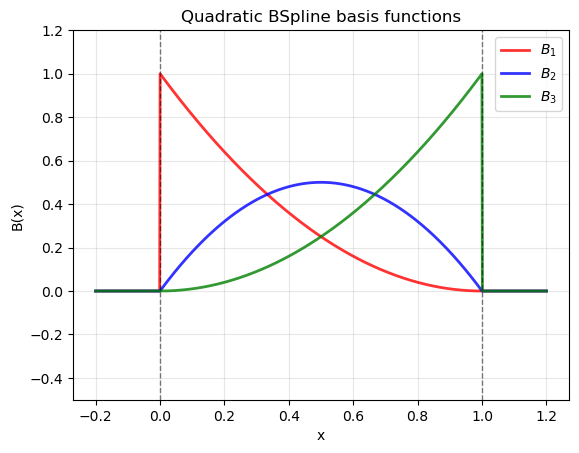

In [2]:
# Create knotvector for quadratic BSplines
t_quadratic = Knotvector(degree=2, domain=(0, 1), name="quadratic_knots")

# Create quadratoc BSpline Space
V_quadratic = BSplineSpace(t_quadratic, name="Quadratic_BSpline_Space")

print(f"B-spline Space: {V_quadratic.name}")
print(f"Degree: {V_quadratic.degree}")
print(f"Κnot vector: {t_quadratic.items}")
print(f"Valid functions (knot IDs): {V_quadratic.valid_function_keys}")
print(f"Number of basis functions: {V_quadratic.nr_items}")

# Graphs
x = np.linspace(-0.2, 1.2, 1000)

colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, key in enumerate(V_quadratic.keys):
    B = V_quadratic[key]
    y = B(x)
    
    plt.plot(x, y, color=colors[i % len(colors)], linewidth=2, 
             label=f'{B.name}', alpha=0.8)

# Plot knots
for knot in np.unique(t_quadratic.items):
    plt.axvline(x=knot, color='black', linestyle='--', alpha=0.5, linewidth=1)

plt.xlabel('x')
plt.ylabel('B(x)')
plt.title('Quadratic BSpline basis functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 1.2)

# Example 2: Derivatives

Initial space: Cubic_BSpline_Space
Degree: 3
Number of functions: 4

First derivative: Cubic_BSpline_Derivative_1
Derivation order: 1
Function names: ['$B_{1}$${}^{(1)}$', '$B_{2}$${}^{(1)}$', '$B_{3}$${}^{(1)}$', '$B_{4}$${}^{(1)}$']

Second derivative: Cubic_BSpline_Derivative_2
Derivation order: 2


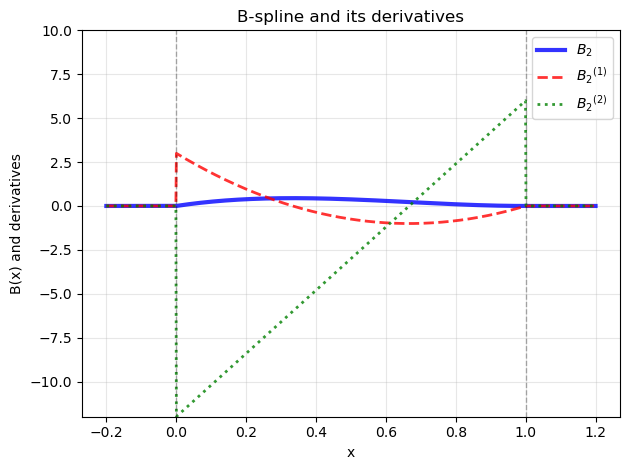

In [3]:
# Create Cubic knot vector and BSplines
t_cubic = Knotvector(degree=3, domain=(0, 1), name="cubic_knots")
V_cubic = BSplineSpace(t_cubic, name="Cubic_BSpline_Space")

print(f"Initial space: {V_cubic.name}")
print(f"Degree: {V_cubic.degree}")
print(f"Number of functions: {V_cubic.nr_items}")

# Create derivatives
V_cubic_prime = V_cubic.diff(1, name="Cubic_BSpline_Derivative_1")
V_cubic_double_prime = V_cubic.diff(2, name="Cubic_BSpline_Derivative_2")

print(f"\nFirst derivative: {V_cubic_prime.name}")
print(f"Derivation order: {V_cubic_prime.derivative}")
print(f"Function names: {[f.name for f in V_cubic_prime.items]}")

print(f"\nSecond derivative: {V_cubic_double_prime.name}")
print(f"Derivation order: {V_cubic_double_prime.derivative}")

# Graphs
x = np.linspace(-0.2, 1.2, 1000)

# Select B2 to demonstrate its derivateds
selected_key = 2 # B2

# Initial function
B_original = V_cubic[selected_key]
y_original = B_original(x)
plt.plot(x, y_original, 'b-', linewidth=3, label=f'{B_original.name}', alpha=0.8)

# First derivative
B_prime = V_cubic_prime[selected_key]
y_prime = B_prime(x)
plt.plot(x, y_prime, 'r--', linewidth=2, label=f'{B_prime.name}', alpha=0.8)

# Second derivative
B_double_prime = V_cubic_double_prime[selected_key]
y_double_prime = B_double_prime(x)
plt.plot(x, y_double_prime, 'g:', linewidth=2, label=f'{B_double_prime.name}', alpha=0.8)

# Plot knots
for knot in np.unique(t_cubic.items):
    plt.axvline(x=knot, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.xlabel('x')
plt.ylabel('B(x) and derivatives')
plt.title('B-spline and its derivatives')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-12, 10)

plt.tight_layout()
plt.show()

## Example 3: Evaluation at specific points

In [11]:
# Σημεία αξιολόγησης
eval_points = [0.0, 0.25, 0.5, 0.75, 1.0]

print("Evaluation of quadratic B-splines")
print("Point\t" + "\t".join([f"B_{i}(x)" for i in V_quadratic.valid_function_keys]))

for point in eval_points:
    values = [V_quadratic[key](point) for key in V_quadratic.valid_function_keys]
    print(f"{point:.2f}\t" + "\t".join([f"{val:.3f}" for val in values]))

# Check if partition of unity holds
print("\nChecking for Partition of Unity:")
x_test = np.linspace(0, 1, 11)
for x_val in x_test:
    sum_values = sum(V_quadratic[key](x_val) for key in V_quadratic.valid_function_keys)
    print(f"x = {x_val:.1f}: ΣB_i(x) = {sum_values:.6f}")


Evaluation of quadratic B-splines
Point	B_1(x)	B_2(x)	B_3(x)
0.00	1.000	0.000	0.000
0.25	0.562	0.375	0.062
0.50	0.250	0.500	0.250
0.75	0.062	0.375	0.562
1.00	0.000	0.000	1.000

Checking for Partition of Unity:
x = 0.0: ΣB_i(x) = 1.000000
x = 0.1: ΣB_i(x) = 1.000000
x = 0.2: ΣB_i(x) = 1.000000
x = 0.3: ΣB_i(x) = 1.000000
x = 0.4: ΣB_i(x) = 1.000000
x = 0.5: ΣB_i(x) = 1.000000
x = 0.6: ΣB_i(x) = 1.000000
x = 0.7: ΣB_i(x) = 1.000000
x = 0.8: ΣB_i(x) = 1.000000
x = 0.9: ΣB_i(x) = 1.000000
x = 1.0: ΣB_i(x) = 1.000000


## Example 4: Use of a NonUniform knotvector

Non-uniform knot vector: [0.  0.  0.  0.3 0.7 1.  1.  1. ]
Number of functions: 3


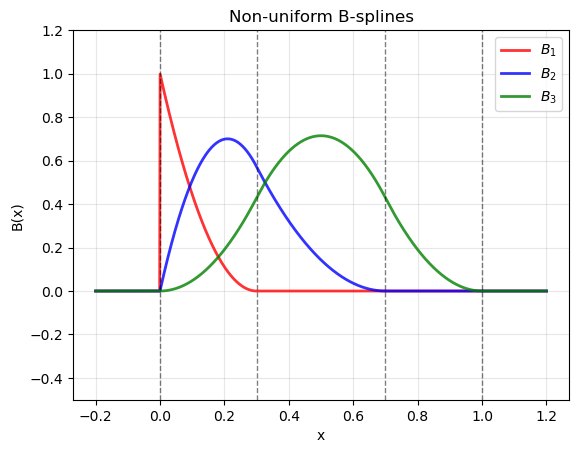

In [13]:
# Create a custom (non-uniform) knotvector
knots_nonuniform = [0, 0, 0, 0.3, 0.7, 1, 1, 1]  # Clamped cubic B-spline
t_nonuniform = Knotvector(degree=2, domain=(0, 1), name="nonuniform_knots")
t_nonuniform.items = np.array(knots_nonuniform)  # Replace default knots with custom values

V_nonuniform = BSplineSpace(t_nonuniform, name="NonUniform_BSpline_Space")

print(f"Non-uniform knot vector: {t_nonuniform.items}")
print(f"Number of functions: {V_nonuniform.nr_items}")

# Graphs
colors_nonuniform = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i, key in enumerate(V_nonuniform.keys):
    B = V_nonuniform[key]
    y = B(x)
    
    plt.plot(x, y, color=colors_nonuniform[i % len(colors_nonuniform)], 
             linewidth=2, label=f'{B.name}', alpha=0.8)

# Show knot locations
for knot in np.unique(t_nonuniform.items):
    plt.axvline(x=knot, color='black', linestyle='--', alpha=0.5, linewidth=1)

plt.xlabel('x')
plt.ylabel('B(x)')
plt.title('Non-uniform B-splines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 1.2)
plt.show()